In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from statsmodels.formula.api import ols
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from numpy import mean, std
from sklearn.manifold import MDS

# Load into Python
estimation_list = pd.read_excel('prospect_scoring.xlsx', sheet_name=0)
holdout_list = pd.read_excel('prospect_scoring.xlsx', sheet_name=1)

# Add a column of ones in the starting of each dataframe
estimation_list.insert(0, 'Intercept', 1)
holdout_list.insert(0, 'Intercept', 1)

1. Run a logistic regression on the estimation list of 200 persons predicting y as a function
of gender and the seven hotline variables and the intercept (constant) term. Do not eliminate coefficients which appear statistically insignificant. Hand-in: The score equation
for t from the logistic regression.

In [21]:
# run a logistic regression using statsmodels

Xtrain = estimation_list.iloc[:, :-1]
ytrain = estimation_list.iloc[:, -1]

model = sm.Logit(ytrain, Xtrain)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.579248
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.1135
Time:                        11:26:02   Log-Likelihood:                -115.85
converged:                       True   LL-Null:                       -130.68
Covariance Type:            nonrobust   LLR p-value:                 0.0002419
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -10.3659      2.477     -4.185      0.000     -15.220      -5.511
Gender     

2. Evaluate the score function for each person in the holdout list of 300 persons. Based on
this, compute the following for each person: (1) the predicted response probability r, (2)
the consequent lift, which is obtained by dividing the predicted response probability by
the average response rate in the estimation list. No Hand-in.

In [22]:
holdout_list['r'] = result.predict(holdout_list.iloc[:, :-1])
holdout_list['lift'] = holdout_list['r'] / holdout_list['r'].mean()

3. Sort all the 300 persons in the holdout list in decreasing order of lift as is done in slide 30. No Hand-in.

In [23]:
holdout_list.sort_values(by = 'lift', ascending = False, inplace = True, ignore_index = True)

4. Plot the curve for marginal response rate vs number of solicitations made, like in the
chart that appears on slide 31. The “marginal response rate” of the person at rank n is
the nth-highest predicted response probability r. The plot should have the rank on the
horizontal axis and the corresponding r on the vertical axis. Hand-in: the chart.

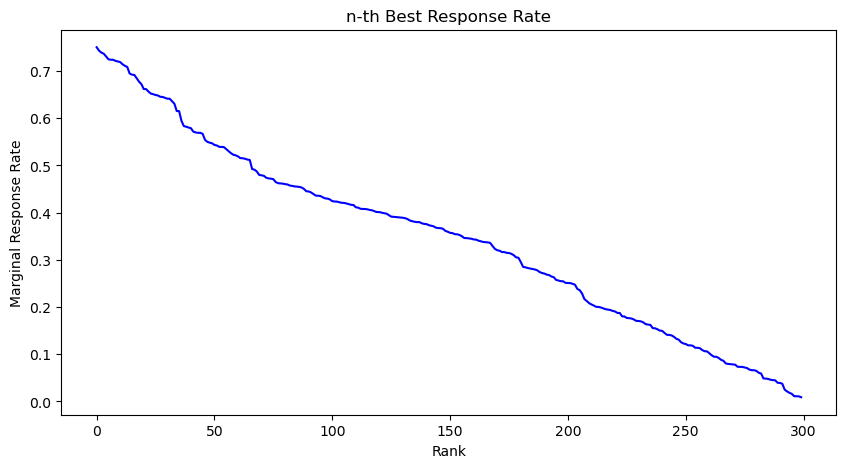

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(holdout_list['r'], color='blue')
plt.xlabel('Rank')
plt.ylabel('Marginal Response Rate')
plt.title('n-th Best Response Rate')
plt.show()

5. Suppose average LT Customer equity is $30, and the solicitation cost is $12. Use the
marginal cost rule to calculate how many of the best prospects in the holdout list Melrose
should contact. Hand-in: your calculations and final answer.

In [25]:
holdout_list.loc[holdout_list.r > 12/30][-1:].index

Index([120], dtype='int64')

6. Compute the cumulative sum (aka running sum) of the predicted response probability
r when the persons are sorted as in Question 3. This cumulative sum at rank n gives
the expected number of conversions or positive responses if the firm were to contact
the n customers with the highest r. Plot the curve of the expected number of positive
responses vs number of solicitations made, like in the chart that appears on slide 33.
You will notice that the curve does not rise as fast as one would expect from the usual
80/20 rule. Explain why the curve might be of this shape here. Hand-in: the chart and
your explanation.

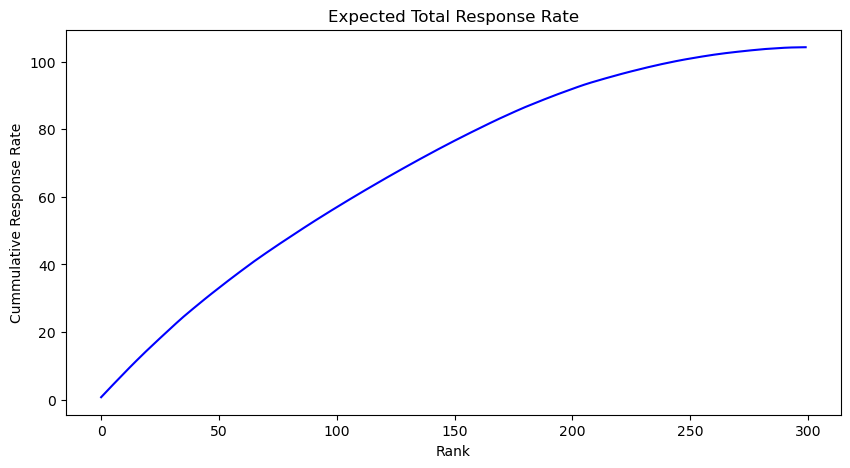

In [26]:
holdout_list['cum_r'] = holdout_list['r'].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(holdout_list['cum_r'], color='blue')
plt.xlabel('Rank')
plt.ylabel('Cummulative Response Rate')
plt.title('Expected Total Response Rate')
plt.show()

7. Assume that the firm has enough raw Belgian chocolate to make only 40 boxes of the
pralines offered as part of the introductory offer. Use the limited supply rule to calculate
how many of the best prospects in the holdout list Melrose should send solicitations to.
Hand-in: your calculations and final answer.

In [27]:
holdout_list.loc[holdout_list['cum_r'] < 40][-1:].index

Index([63], dtype='int64')

8. To test how well the scoring model predicts actual performance, Melrose sent the solicitation offer to all 300 persons on the holdout list. The actual response is available as
the y variable in the holdout list data part of the spreadsheet. Compute the cumulative
sum (aka running sum) for this y variable when the persons are sorted as in Question 3. The cumulative sum of y at rank n gives the total actual number of conversions or
positive responses when the firm contacted the n customers with the highest r. Plot this
cumulative sum vs the number of solicitations made. Superimpose on this the curve
obtained in step 6 above to get a chart akin to slide 44 . Based on this chart, comment on
the discrepancies between the actual responses and the predicted response probabilities
for the prospects. Comment also on the consequent impact on the decision made in step
7 above. Hand-in: the chart and your comments.

Text(0.5, 1.0, 'Validation Sample Analysis')

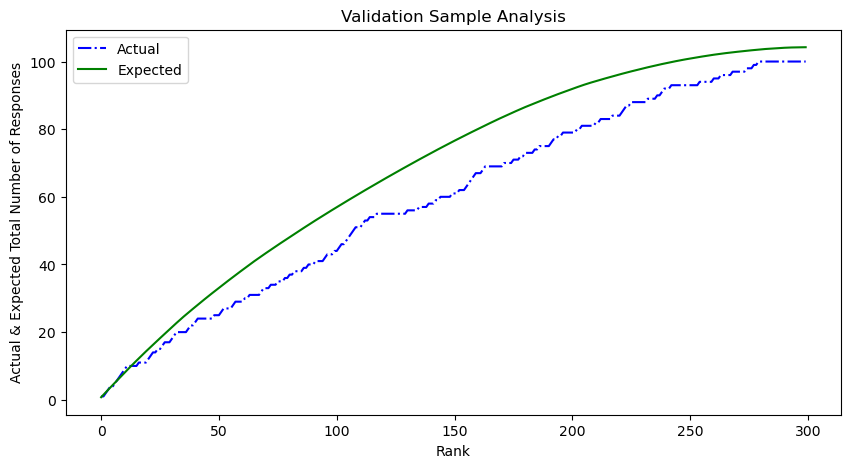

In [28]:
holdout_list['cum_y'] = holdout_list['y'].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(holdout_list['cum_y'], color='blue', label='Actual', linestyle='dashdot')
plt.plot(holdout_list['cum_r'], color='green', label='Expected')
plt.xlabel('Rank')
plt.ylabel('Actual & Expected Total Number of Responses')
plt.legend()
plt.title('Validation Sample Analysis')